In [1]:
# Kfold的理解
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(n_splits=3, shuffle = True, random_state= 1)
# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'  #默认为'last'
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier 
%matplotlib inline

In [4]:
#定义模型
models = {}
models['LR'] = LogisticRegression(solver='lbfgs')
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['DTC'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models["NN"] = MLPClassifier(activation='tanh',solver='adam',alpha=0.0001,learning_rate='adaptive',learning_rate_init=0.001,max_iter=200)
# models['SVM'] = SVC(gamma='auto')

In [5]:
train_set = pd.read_csv("./train_set.csv")
train_set = pd.DataFrame(train_set)
train_set = train_set.drop(columns="ID")
# test_set = pd.DataFrame(train_set)
train_set.head()
# test_set.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [6]:
train_set.shape

(25317, 17)

In [7]:
vec = DictVectorizer(sparse=False)
train_set = vec.fit_transform(train_set.to_dict(orient="record"))
train_set = pd.DataFrame(train_set)
train_set.columns = vec.feature_names_
train_set

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous,y
0,43.0,291.0,2.0,0.0,0.0,1.0,9.0,1.0,0.0,150.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,42.0,5076.0,1.0,1.0,0.0,0.0,7.0,1.0,0.0,99.0,...,0.0,0.0,0.0,251.0,0.0,1.0,0.0,0.0,2.0,0.0
2,47.0,104.0,2.0,1.0,0.0,0.0,14.0,1.0,0.0,77.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,-994.0,2.0,1.0,0.0,0.0,18.0,1.0,0.0,174.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,42.0,2974.0,5.0,0.0,0.0,1.0,21.0,1.0,0.0,187.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,55.0,8180.0,2.0,1.0,0.0,0.0,14.0,1.0,0.0,854.0,...,0.0,0.0,0.0,360.0,1.0,0.0,0.0,0.0,1.0,1.0
25313,52.0,961.0,1.0,1.0,0.0,0.0,18.0,1.0,0.0,222.0,...,0.0,0.0,0.0,553.0,1.0,0.0,0.0,0.0,4.0,1.0
25314,35.0,300.0,2.0,0.0,0.0,1.0,13.0,1.0,0.0,945.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0
25315,37.0,66.0,2.0,1.0,0.0,0.0,18.0,1.0,0.0,1164.0,...,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [14]:
X = train_set.iloc[:, :-1]
Y = train_set.iloc[:, -1]
X

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=may,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous
0,43.0,291.0,2.0,0.0,0.0,1.0,9.0,1.0,0.0,150.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
1,42.0,5076.0,1.0,1.0,0.0,0.0,7.0,1.0,0.0,99.0,...,0.0,0.0,0.0,0.0,251.0,0.0,1.0,0.0,0.0,2.0
2,47.0,104.0,2.0,1.0,0.0,0.0,14.0,1.0,0.0,77.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,28.0,-994.0,2.0,1.0,0.0,0.0,18.0,1.0,0.0,174.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
4,42.0,2974.0,5.0,0.0,0.0,1.0,21.0,1.0,0.0,187.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,55.0,8180.0,2.0,1.0,0.0,0.0,14.0,1.0,0.0,854.0,...,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0,0.0,1.0
25313,52.0,961.0,1.0,1.0,0.0,0.0,18.0,1.0,0.0,222.0,...,0.0,0.0,0.0,0.0,553.0,1.0,0.0,0.0,0.0,4.0
25314,35.0,300.0,2.0,0.0,0.0,1.0,13.0,1.0,0.0,945.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
25315,37.0,66.0,2.0,1.0,0.0,0.0,18.0,1.0,0.0,1164.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=33)
x_train
# y_train.shape

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=may,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous
5884,30.0,105.0,1.0,1.0,0.0,0.0,21.0,1.0,0.0,75.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
16037,36.0,2176.0,2.0,0.0,0.0,1.0,28.0,1.0,0.0,52.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
16348,43.0,0.0,3.0,1.0,0.0,0.0,7.0,1.0,0.0,240.0,...,1.0,0.0,0.0,0.0,293.0,1.0,0.0,0.0,0.0,5.0
20597,50.0,-465.0,11.0,0.0,0.0,1.0,30.0,1.0,0.0,42.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10583,32.0,393.0,2.0,1.0,0.0,0.0,28.0,1.0,0.0,458.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,48.0,2204.0,1.0,1.0,0.0,0.0,12.0,1.0,0.0,45.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
578,49.0,766.0,4.0,1.0,0.0,0.0,7.0,1.0,0.0,150.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
5848,34.0,10.0,1.0,1.0,0.0,0.0,22.0,1.0,0.0,81.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
2439,36.0,1392.0,1.0,1.0,0.0,0.0,17.0,1.0,0.0,231.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
results = []

num_folds = 10
seed = 7
#使用准确度进行评估
scoring = 'accuracy'

kfold = KFold(n_splits=num_folds, random_state=seed)
for key in tqdm(models):
    #交叉验证每次运行的评分数组
    cv_results = cross_val_score(models[key],
                                 x_train,
                                 y_train,
                                 cv=kfold,
                                 scoring=scoring)
    results.append(cv_results)
    print('%s::%f(%f)' % (key, cv_results.mean(), cv_results.std()))

LR::0.892664(0.006314)
LDA::0.901670(0.004762)
KNN::0.882183(0.005805)
DTC::0.877706(0.006364)
NB::0.849844(0.007726)
NN::0.895191(0.008153)



Text(0.5, 0.98, 'Algorithm Comparison')

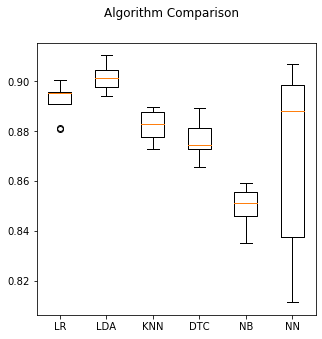

In [104]:
plt.figure(figsize=(5,5))
plt.boxplot(results)
plt.xticks(range(1,len(models.keys())+1),models.keys())
plt.suptitle('Algorithm Comparison')


In [85]:
lda = models["LDA"].fit(x_train,y_train)
lda.score(x_test,y_test)

0.8988941548183255

LR::0.903144(0.007053)
LDA::0.901670(0.004762)
KNN::0.892084(0.006339)
DTC::0.877548(0.005234)
NB::0.848633(0.007072)


([<matplotlib.axis.XTick at 0x25b154251d0>,
 <a list of 5 Text xticklabel objects>)

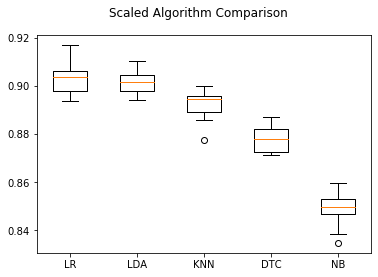

In [93]:
from sklearn.pipeline import make_pipeline
scaled_results = []
num_folds=10
seed = 7
#使用准确度进行评估
scoring='accuracy'

for key in models.keys():
    pip = make_pipeline(StandardScaler(),models[key])
    cv_results = cross_val_score(pip,x_train,y_train,cv=kfold,
                                 scoring=scoring)
    scaled_results.append(cv_results)
    print('%s::%f(%f)'%(key,cv_results.mean(),cv_results.std()))

#正态化-箱线图
plt.figure()
plt.suptitle('Scaled Algorithm Comparison')
plt.boxplot(scaled_results)
plt.xticks(range(1,len(models.keys())+1),models.keys())
#plt.show()


In [ ]:
#分类报告
from sklearn.metrics import classification_report

In [86]:
test_set = pd.read_csv("./test_set.csv")
ID = test_set['ID']
test_set = test_set.drop(columns="ID")
test_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,29,management,single,tertiary,no,54,yes,yes,unknown,26,may,257,3,-1,0,unknown
10848,35,management,married,secondary,no,674,no,no,cellular,8,aug,87,2,-1,0,unknown
10849,38,services,married,secondary,no,435,yes,no,unknown,23,may,193,2,-1,0,unknown
10850,41,admin.,divorced,secondary,no,783,yes,yes,cellular,14,may,135,3,363,2,failure


In [87]:
vec = DictVectorizer(sparse=False)
data = vec.fit_transform(test_set.to_dict(orient="record"))
data = pd.DataFrame(data)
data.columns = vec.feature_names_
data

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,default=no,default=yes,duration,...,month=may,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous
0,51.0,174.0,3.0,0.0,1.0,0.0,29.0,1.0,0.0,308.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
1,32.0,6059.0,2.0,1.0,0.0,0.0,20.0,1.0,0.0,110.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,0.0,3.0,0.0,1.0,0.0,30.0,1.0,0.0,130.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,32.0,64.0,4.0,1.0,0.0,0.0,30.0,1.0,0.0,598.0,...,0.0,0.0,0.0,0.0,105.0,1.0,0.0,0.0,0.0,5.0
4,41.0,0.0,4.0,1.0,0.0,0.0,15.0,1.0,0.0,368.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10847,29.0,54.0,3.0,0.0,0.0,1.0,26.0,1.0,0.0,257.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10848,35.0,674.0,2.0,1.0,0.0,0.0,8.0,1.0,0.0,87.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10849,38.0,435.0,2.0,0.0,0.0,1.0,23.0,1.0,0.0,193.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
10850,41.0,783.0,3.0,1.0,0.0,0.0,14.0,1.0,0.0,135.0,...,1.0,0.0,0.0,0.0,363.0,1.0,0.0,0.0,0.0,2.0


In [88]:
predict = lda.predict_proba(data)
result = pd.DataFrame(predict).iloc[:,1]
ID = pd.DataFrame(ID)
ID.insert(1,"pred",result)
ID.to_csv("result.csv",index=False)